In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("TSLA.csv")

In [3]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,19.000000,25.000000,17.540001,23.889999,23.889999,18766300
1,2010-06-30,25.790001,30.420000,23.299999,23.830000,23.830000,17187100
2,2010-07-01,25.000000,25.920000,20.270000,21.959999,21.959999,8218800
3,2010-07-02,23.000000,23.100000,18.709999,19.200001,19.200001,5139800
4,2010-07-06,20.000000,20.000000,15.830000,16.110001,16.110001,6866900
5,2010-07-07,16.400000,16.629999,14.980000,15.800000,15.800000,6921700
6,2010-07-08,16.139999,17.520000,15.570000,17.459999,17.459999,7711400
7,2010-07-09,17.580000,17.900000,16.549999,17.400000,17.400000,4050600
8,2010-07-12,17.950001,18.070000,17.000000,17.049999,17.049999,2202500
9,2010-07-13,17.389999,18.639999,16.900000,18.139999,18.139999,2680100


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2416 non-null   object 
 1   Open       2416 non-null   float64
 2   High       2416 non-null   float64
 3   Low        2416 non-null   float64
 4   Close      2416 non-null   float64
 5   Adj Close  2416 non-null   float64
 6   Volume     2416 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 132.2+ KB


In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2416.000000,2416.000000,2416.000000,2416.000000,2416.000000,2.416000e+03
mean,186.271147,189.578224,182.916639,186.403651,186.403651,5.572722e+06
std,118.740163,120.892329,116.857591,119.136020,119.136020,4.987809e+06
min,16.139999,16.629999,14.980000,15.800000,15.800000,1.185000e+05
25%,34.342498,34.897501,33.587501,34.400002,34.400002,1.899275e+06
50%,213.035003,216.745002,208.870002,212.960007,212.960007,4.578400e+06
75%,266.450012,270.927513,262.102501,266.774994,266.774994,7.361150e+06
max,673.690002,786.140015,673.520020,780.000000,780.000000,4.706500e+07


In [6]:
x = df[['High','Low','Open','Volume']]
y = df['Close'].values

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [9]:
# spliiting the algorithm 
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size =0.2)

In [10]:
reg = LinearRegression()

In [11]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [13]:
print(reg.coef_)

[ 9.13319433e-01  7.39845247e-01 -6.54496977e-01 -1.64397987e-08]


In [14]:
predicts = reg.predict(x_test)

In [15]:
new = pd.DataFrame({'Actual' : y_test.flatten() ,'Predicted' : predicts})

In [17]:
new.head(30)

,Actual,Predicted
0,121.610001,119.847906
1,218.550003,219.670845
2,147.380005,144.417851
3,362.369995,365.059409
4,33.340000,32.977317
5,254.509995,252.212944
6,198.229996,200.288243
7,178.699997,177.124443
8,20.049999,20.127773
9,280.739990,280.215652


In [18]:
from sklearn import metrics
import math

print(" MSE : ", metrics.mean_absolute_error(y_test,predicts))
print(" RMSE : ", math.sqrt(metrics.mean_absolute_error(y_test,predicts)))


 MSE :  1.483259881526385
 RMSE :  1.2178915721550851


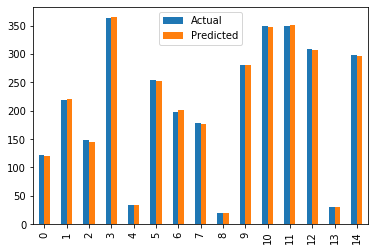

In [19]:
graph = new.head(15)
graph.plot(kind = 'bar')